<a href="https://colab.research.google.com/github/ducanhho2296/Instance-Segmentation-using-YoloV5/blob/main/yolov5_instance_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.2-186-g7f097dd Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 37.6/78.2 GB disk)


Testing set

In [2]:
!pip install roboflow

%cd ../datasets/

from roboflow import Roboflow
rf = Roboflow(api_key="Auk83XdKiKaoEJlEUjWY")
project = rf.workspace("fpt-university-1tkhk").project("cup-vxkbg")
dataset = project.version(1).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 145 kB 39.1 MB/s 
     |████████████████████████████████| 178 kB 67.3 MB/s 
     |████████████████████████████████| 1.1 MB 51.8 MB/s 
     |████████████████████████████████| 67 kB 6.0 MB/s 
     |████████████████████████████████| 54 kB 1.9 MB/s 
     |████████████████████████████████| 138 kB 58.5 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Created wheel for roboflow: filename=roboflow-0.2.15-py3-none-any.whl size=24936 sha256=665f67fd15c35a258add92a45253352d9798be923d2ea42fe0e51d737caf4386
  Stored in directory: /root/.cache/pip/wheels/13/e0/a3/fe183fffc3972cb9264e800763d4bbfff80d5309137c410217
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=02102ea49869b5be83547408275a7699a9c3db3ae271a01cc220a6cd80755802
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37

[Errno 2] No such file or directory: '../datasets/'
/content/yolov5
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to cup-1 in yolov5pytorch:: 100%|██████████| 66/66 [00:00<00:00, 1442.96it/s]


Training set

In [3]:
%cd ../datasets/
rf = Roboflow(api_key="Auk83XdKiKaoEJlEUjWY")
project = rf.workspace("fpt-university-1tkhk").project("cup-lptfc")
dataset = project.version(1).download("yolov5")

[Errno 2] No such file or directory: '../datasets/'
/content/yolov5
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to cup-1 in yolov5pytorch:: 100%|██████████| 606/606 [00:00<00:00, 870.55it/s] 


In [4]:
%cd ../yolov5
from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']
cls = [f'{x}-seg' for x in p5]

for x in cls:
  attempt_download(f'weights/yolov5{x}.pt')

/content/yolov5


  0%|          | 0.00/4.11M [00:00<?, ?B/s]

  0%|          | 0.00/14.9M [00:00<?, ?B/s]

  0%|          | 0.00/42.4M [00:00<?, ?B/s]

  0%|          | 0.00/91.9M [00:00<?, ?B/s]

  0%|          | 0.00/170M [00:00<?, ?B/s]

segment/train: weights=yolov5s-seg.pt, cfg=, data=/content/yolov5/cup-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=25, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train-seg, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, mask_ratio=4, no_overlap=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-186-g7f097dd Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=

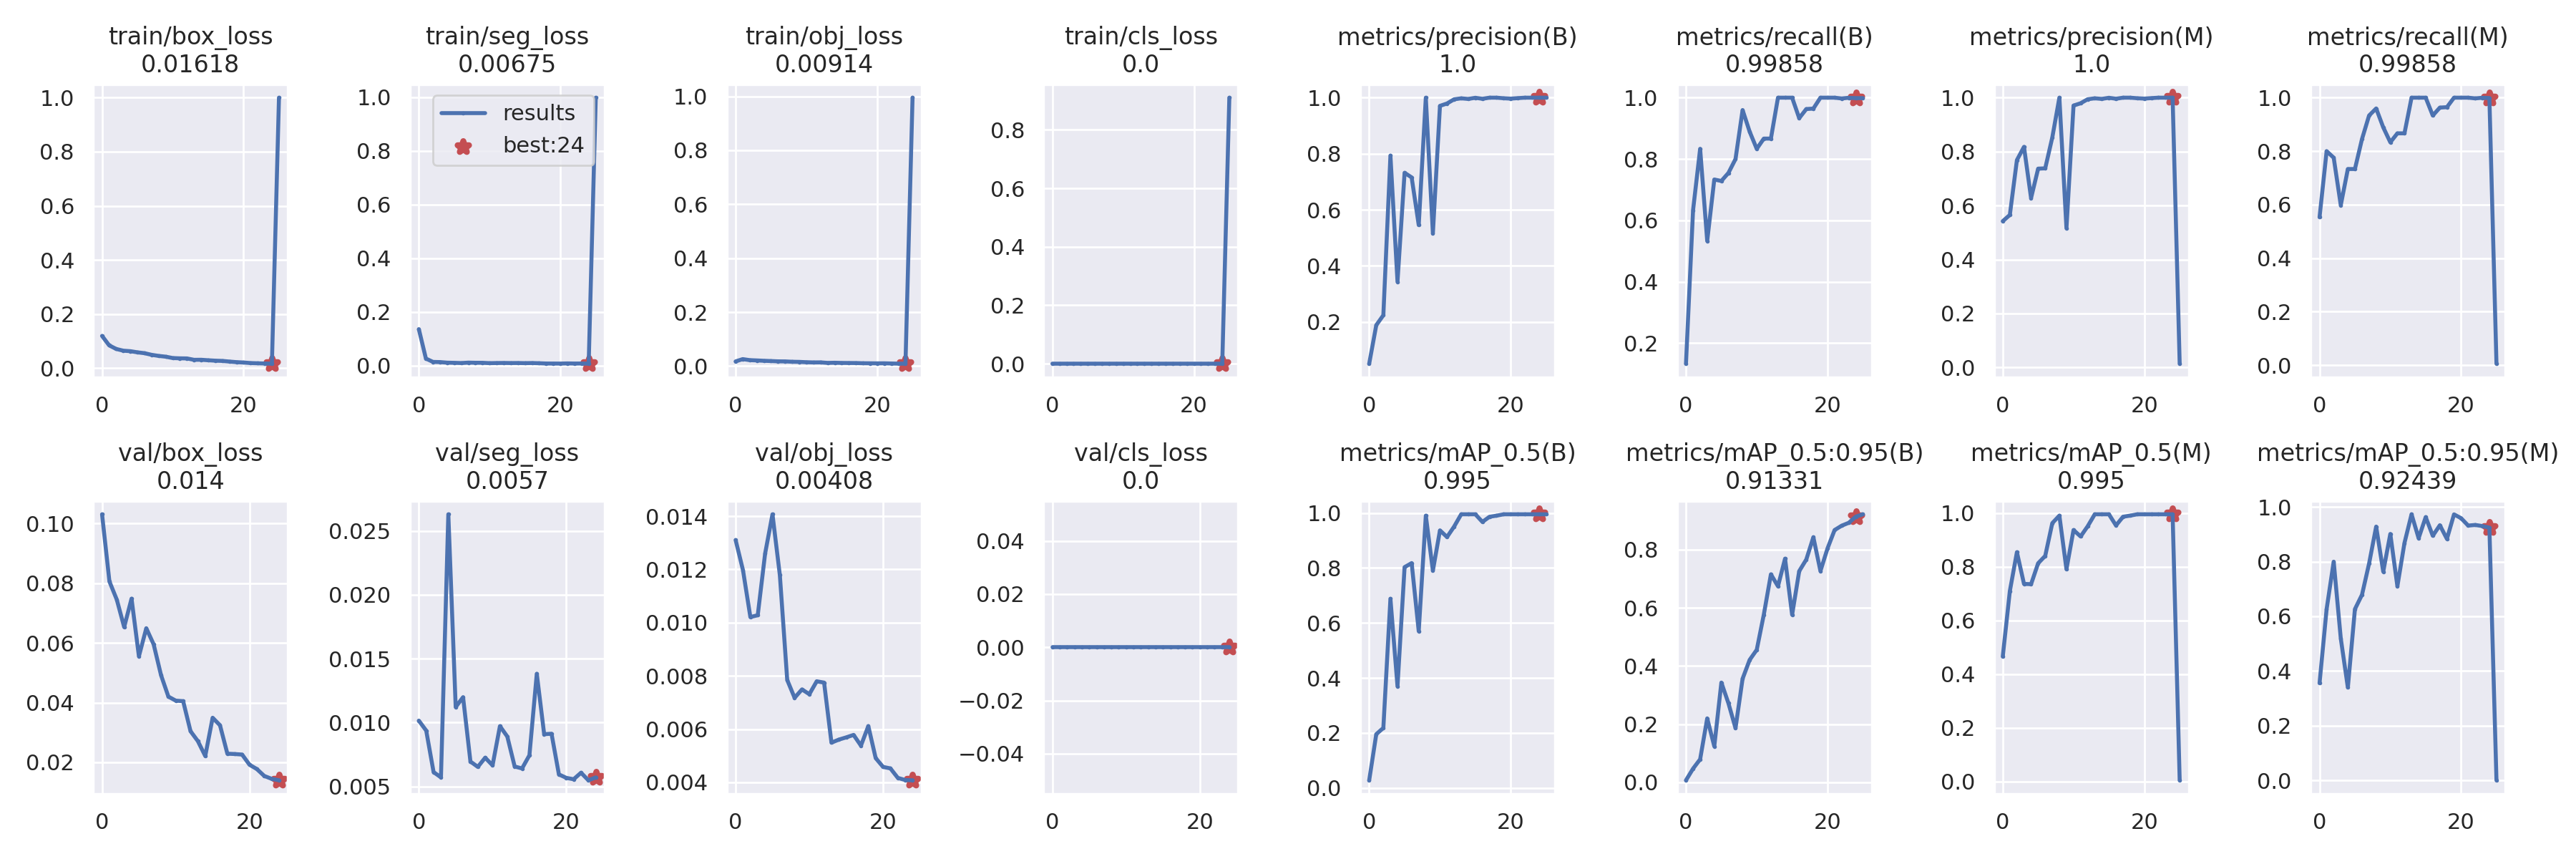

In [5]:
!python segment/train.py --img 320 --batch 16 --epochs 25 --data {dataset.location}/data.yaml --weights yolov5s-seg.pt
display.Image(filename=f'runs/train-seg/exp/results.png', width=1200)